
# Loading Data


In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
df = pd.read_csv('loan.csv',low_memory = False)

# Data Information


In [341]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Missing Value Check

In [342]:
(df.isnull().mean())*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

# Cleansing Data: Dropping columns having more than or equal to 60% null value

In [343]:
df.dropna(thresh=df.shape[0]*0.6,axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

# New Dataframe with cleansed data

In [344]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


# Analysis

In [345]:
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [346]:
cat_columns = ['addr_state','emp_length,','issue_d','purpose','verification_status','grade','sub_grade','loan_status'] #categorical columns
num_columns = ['term','annual_inc','funded_amnt','int_rate','inq_last_6mths','delinq_2yrs'] # numeric columns
extra_columns = ['total_rec_late_fee','recoveries'] # additional columns for analysis

# Filtering the data based on the categorical and numeric columns identified

In [347]:
df = df[['addr_state','emp_length','annual_inc','issue_d','purpose','verification_status','grade','sub_grade','loan_status','term','funded_amnt','int_rate','inq_last_6mths','delinq_2yrs','total_rec_late_fee','recoveries']]
df = df[df.loan_status == 'Charged Off']
df.shape
df.head()

,addr_state,emp_length,annual_inc,issue_d,purpose,verification_status,grade,sub_grade,loan_status,term,funded_amnt,int_rate,inq_last_6mths,delinq_2yrs,total_rec_late_fee,recoveries
1,GA,< 1 year,30000.0,Dec-11,car,Source Verified,C,C4,Charged Off,60 months,2500,15.27%,5,0,0.0,117.08
8,CA,4 years,40000.0,Dec-11,small_business,Source Verified,F,F2,Charged Off,60 months,5600,21.28%,2,0,0.0,189.06
9,TX,< 1 year,15000.0,Dec-11,other,Verified,B,B5,Charged Off,60 months,5375,12.69%,0,0,0.0,269.29
12,VA,< 1 year,30000.0,Dec-11,debt_consolidation,Source Verified,C,C1,Charged Off,36 months,9000,13.49%,1,0,0.0,444.30
14,CA,3 years,100000.0,Dec-11,other,Source Verified,B,B2,Charged Off,36 months,10000,10.65%,2,0,0.0,645.10


# Checking Outliers

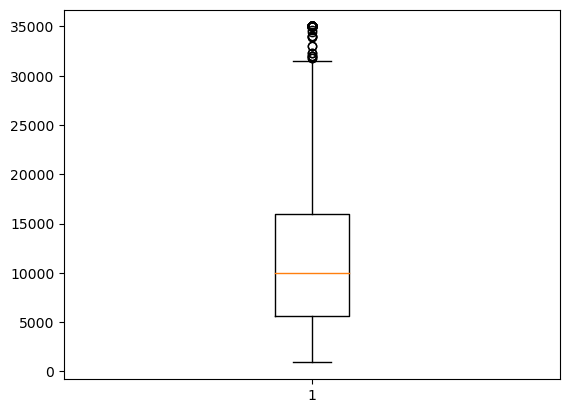

In [348]:
plt.boxplot(df['funded_amnt'])
plt.show()

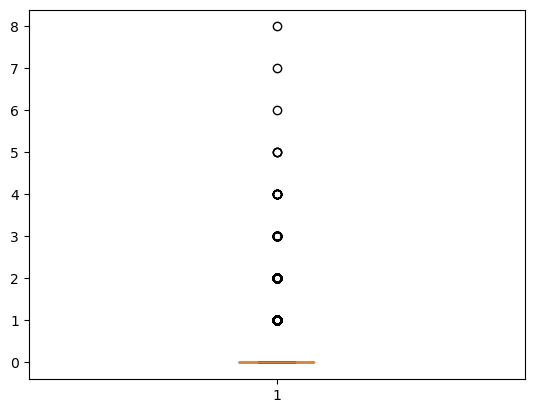

In [349]:
plt.boxplot(df['delinq_2yrs'])
plt.show()
# As we see,using delinq_2yrs column,most of the data is outlier but we cannot remove them because it will help us identifying the probable defaulters.

# Univariate Analysis

# Univariate Analysis on numerical columns

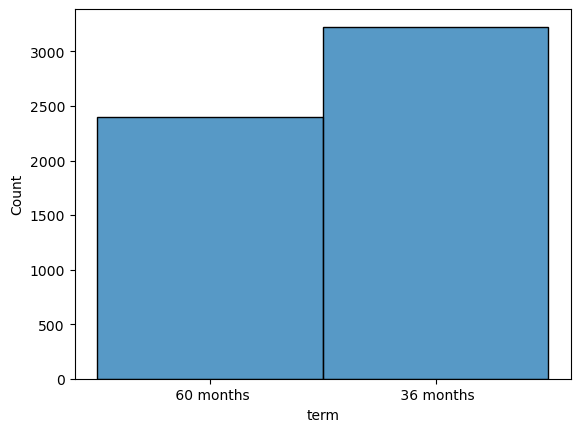

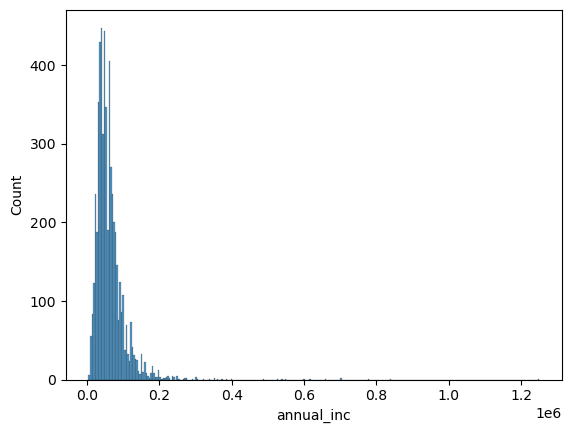

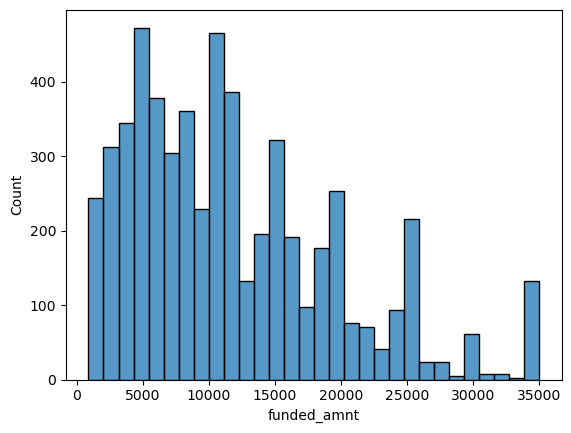

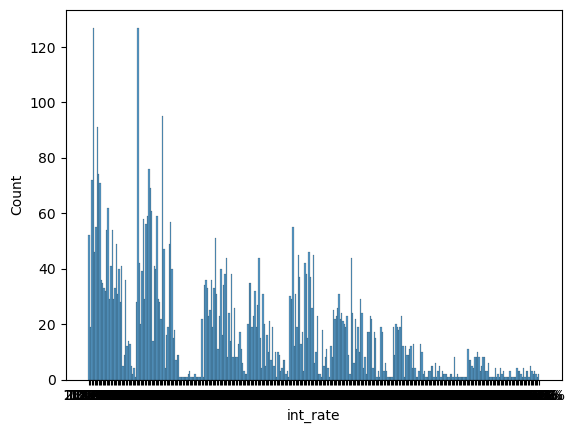

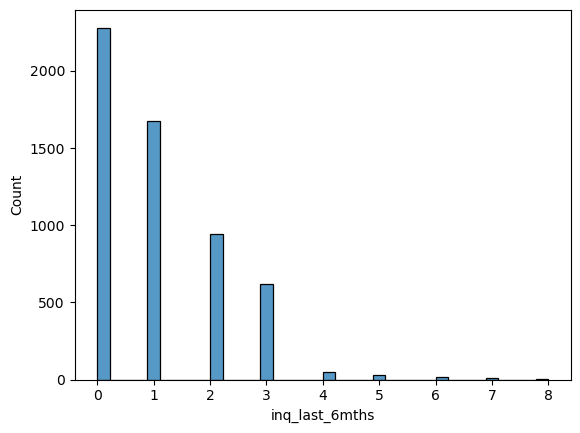

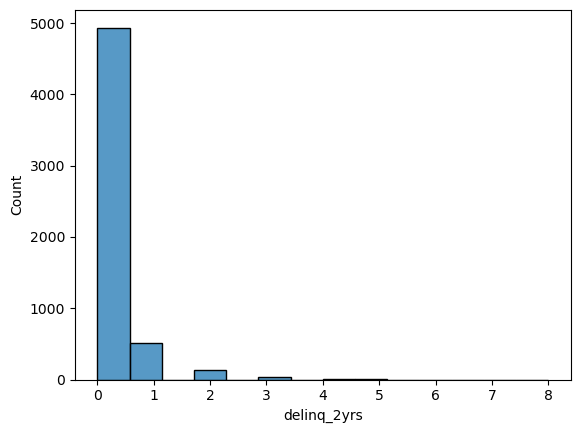

In [350]:
for i in num_columns:
    sns.histplot(df[i])
    plt.show()

# Bivariate Analysis

#### Analysing loan status

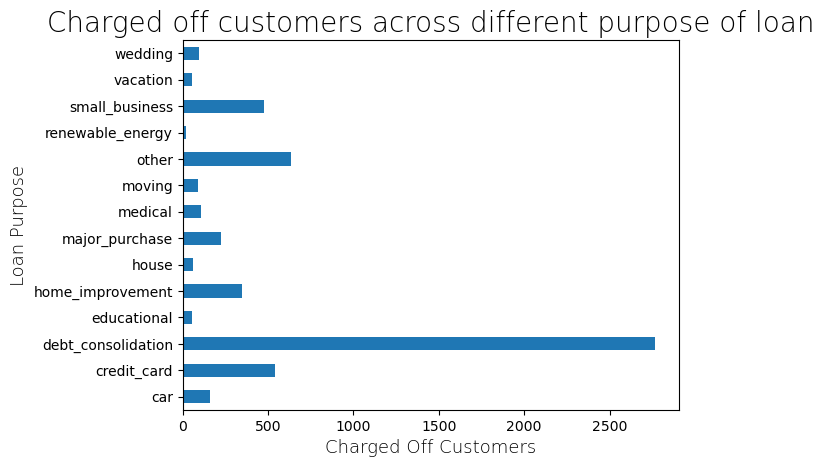

In [351]:
df.groupby(['purpose'])['loan_status'].count().plot.barh()
plt.title('Charged off customers across different purpose of loan',fontdict = {'fontsize':20,'fontweight':5,'color':'black'})
plt.ylabel('Loan Purpose',fontdict = {'fontsize':13,'fontweight':5,'color':'black'})
plt.xlabel('Charged Off Customers',fontdict = {'fontsize':13,'fontweight':5,'color':'black'})
plt.show()

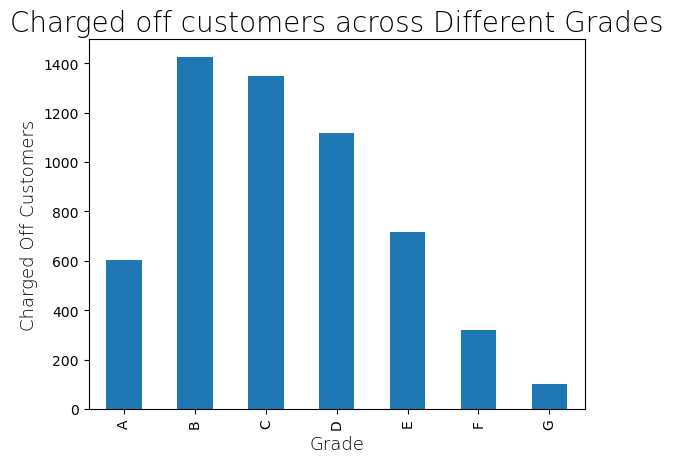

In [352]:
df.groupby(['grade'])['loan_status'].count().plot.bar()
plt.title('Charged off customers across Different Grades',fontdict = {'fontsize':20,'fontweight':5,'color':'black'})
plt.ylabel('Charged Off Customers',fontdict = {'fontsize':13,'fontweight':5,'color':'black'})
plt.xlabel('Grade',fontdict = {'fontsize':13,'fontweight':5,'color':'black'})
plt.show()

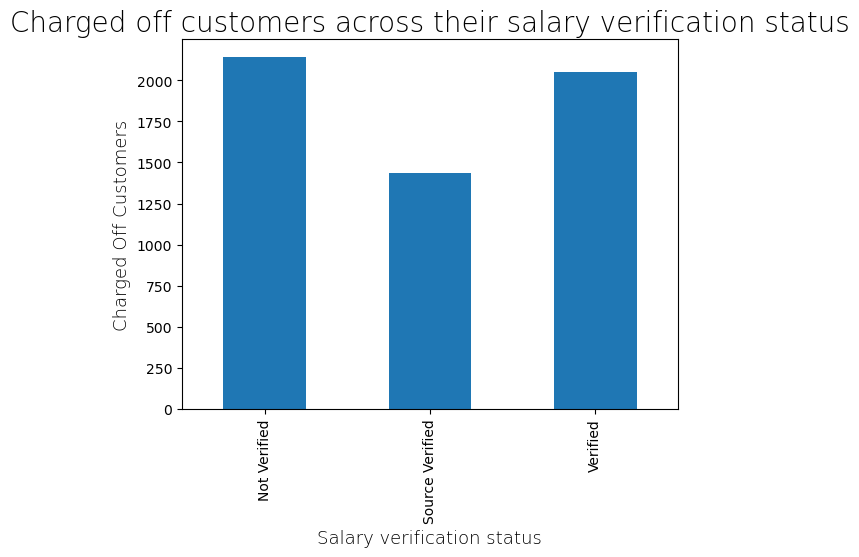

In [353]:
df.groupby(['verification_status'])['loan_status'].count().plot.bar()
plt.title('Charged off customers across their salary verification status',fontdict = {'fontsize':20,'fontweight':5,'color':'black'})
plt.ylabel('Charged Off Customers',fontdict = {'fontsize':13,'fontweight':5,'color':'black'})
plt.xlabel('Salary verification status',fontdict = {'fontsize':13,'fontweight':5,'color':'black'})
plt.show()

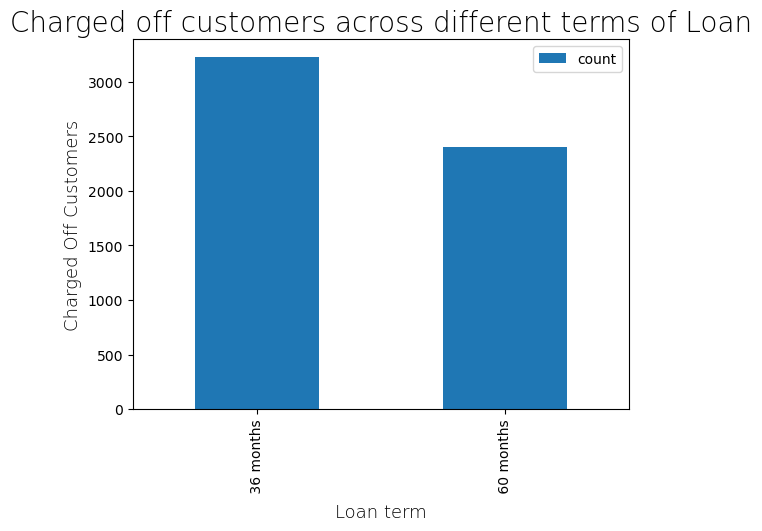

In [354]:
df.groupby('term').agg(count = ('loan_status','count')).plot.bar()
plt.title('Charged off customers across different terms of Loan',fontdict = {'fontsize':20,'fontweight':5,'color':'black'})
plt.ylabel('Charged Off Customers',fontdict = {'fontsize':13,'fontweight':5,'color':'black'})
plt.xlabel('Loan term',fontdict = {'fontsize':13,'fontweight':5,'color':'black'})
plt.show()

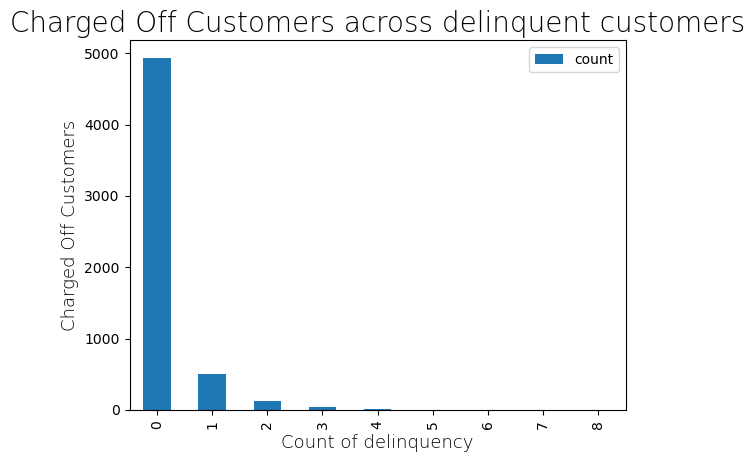

In [355]:
df.groupby('delinq_2yrs').agg(count = ('loan_status','count')).plot.bar()
plt.title('Charged Off Customers across delinquent customers',fontdict = {'fontsize':20,'fontweight':5,'color':'black'})
plt.ylabel('Charged Off Customers',fontdict = {'fontsize':13,'fontweight':5,'color':'black'})
plt.xlabel('Count of delinquency',fontdict = {'fontsize':13,'fontweight':5,'color':'black'})
plt.show()

# Derived Columns

### Converting emp_length from  string to integer

In [356]:
df['emp_length'] = df['emp_length'].apply(lambda x: (((str(x).replace('years','')).replace('< 1 year','0')).replace('10+','10')).replace('year',''))

In [357]:
df['emp_length'] = df['emp_length'].apply(lambda x : str(x).replace('nan','-1'))


In [358]:
df['emp_length'] = df['emp_length'].astype('int64')

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 1 to 39688
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   addr_state           5627 non-null   object 
 1   emp_length           5627 non-null   int64  
 2   annual_inc           5627 non-null   float64
 3   issue_d              5627 non-null   object 
 4   purpose              5627 non-null   object 
 5   verification_status  5627 non-null   object 
 6   grade                5627 non-null   object 
 7   sub_grade            5627 non-null   object 
 8   loan_status          5627 non-null   object 
 9   term                 5627 non-null   object 
 10  funded_amnt          5627 non-null   int64  
 11  int_rate             5627 non-null   object 
 12  inq_last_6mths       5627 non-null   int64  
 13  delinq_2yrs          5627 non-null   int64  
 14  total_rec_late_fee   5627 non-null   float64
 15  recoveries           5627 non-null   

In [360]:
df['emp_exp'] = ['no experience' if x == 0 else 'beginner' if x>0 and x<=3 else 'intermediate' if x>3 and x<=8 else 'expert' if x>8 else 'undetermind experience' for x in df['emp_length']]

In [361]:
df['emp_exp']

1        no experience
8         intermediate
9        no experience
12       no experience
14            beginner
             ...      
39667    no experience
39668    no experience
39669           expert
39678         beginner
39688     intermediate
Name: emp_exp, Length: 5627, dtype: object

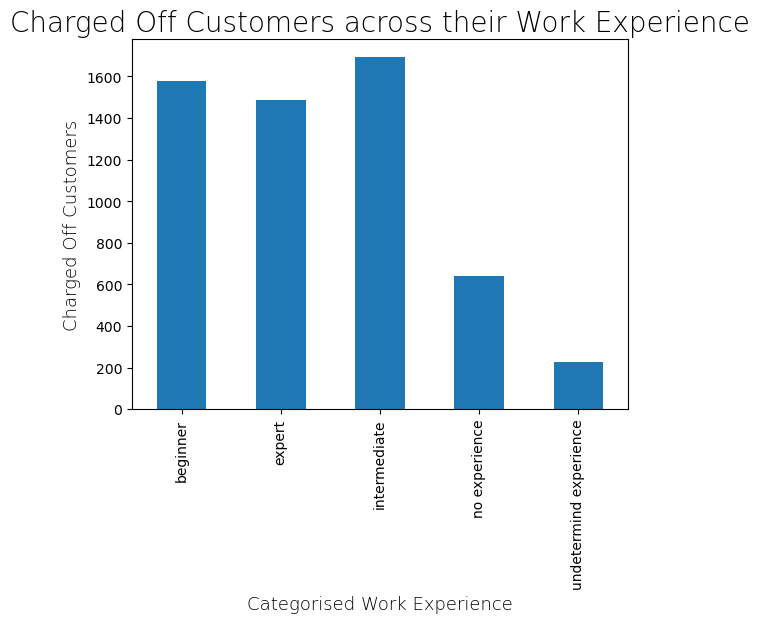

In [362]:
df.groupby(['emp_exp'])['loan_status'].count().plot.bar()
plt.title('Charged Off Customers across their Work Experience',fontdict = {'fontsize':20,'fontweight':5,'color':'black'})
plt.ylabel('Charged Off Customers',fontdict = {'fontsize':13,'fontweight':5,'color':'black'})
plt.xlabel('Categorised Work Experience',fontdict = {'fontsize':13,'fontweight':5,'color':'black'})
plt.show()

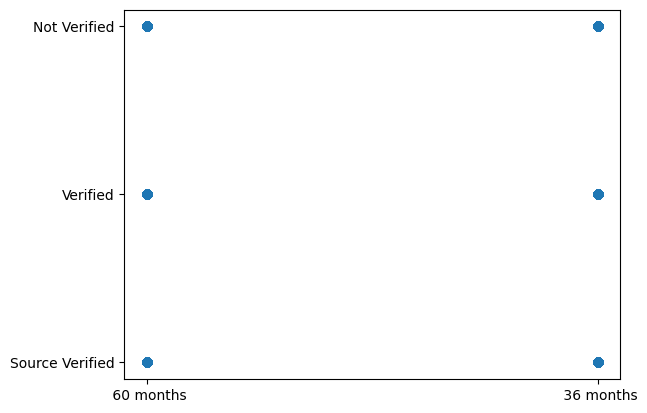

In [363]:
plt.scatter(df['term'],df['verification_status'])
plt.show()

# Estabilishing Correlation between Data for better analysis

In [364]:
df.corr()

C:\Users\gaurav.chaudhary\AppData\Local\Temp\ipykernel_5448\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,emp_length,annual_inc,funded_amnt,inq_last_6mths,delinq_2yrs,total_rec_late_fee,recoveries
emp_length,1.000000,0.155780,0.206959,0.006990,0.009973,-0.019510,0.063512
annual_inc,0.155780,1.000000,0.347131,0.037303,0.021765,0.062817,0.134942
funded_amnt,0.206959,0.347131,1.000000,0.007942,-0.027366,0.094089,0.316077
inq_last_6mths,0.006990,0.037303,0.007942,1.000000,-0.011454,0.017908,-0.014236
delinq_2yrs,0.009973,0.021765,-0.027366,-0.011454,1.000000,0.029122,0.014393
total_rec_late_fee,-0.019510,0.062817,0.094089,0.017908,0.029122,1.000000,0.071332
recoveries,0.063512,0.134942,0.316077,-0.014236,0.014393,0.071332,1.000000


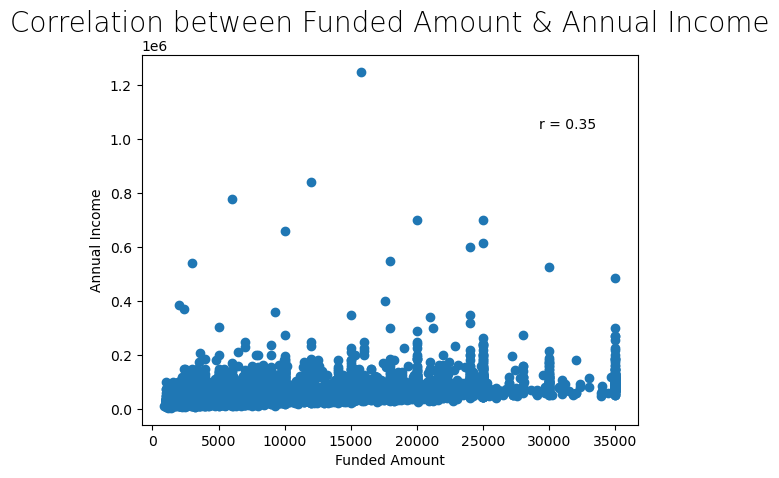

In [365]:
import scipy.stats as stats
plt.scatter(df.funded_amnt,df.annual_inc)
plt.title('Correlation between Funded Amount & Annual Income',fontdict = {'fontsize':20,'fontweight':5,'color':'black'})
plt.xlabel('Funded Amount')
plt.ylabel('Annual Income')
r, p = stats.pearsonr(df.funded_amnt,df.annual_inc)
plt.annotate('r = {:.2f}'.format(r), xy=(0.8, 0.8), xycoords='axes fraction')
plt.show()

# Heatmap Analysis

In [374]:
df['int_rate'] = df['int_rate'].apply(lambda x : str(x).replace('%','')) # removing percent sign from int_rate for analysis
df['int_rate'] = df['int_rate'].astype('float')
df['interest_bucket'] = pd.qcut(df.int_rate,(0,0.25,0.5,0.75,1),('L','M','H','VH')) # creating buckets for heat map analysis

In [375]:
df['interest_bucket']

1         H
8        VH
9         M
12        M
14        L
         ..
39667     M
39668     L
39669     H
39678     L
39688     M
Name: interest_bucket, Length: 5627, dtype: category
Categories (4, object): ['L' < 'M' < 'H' < 'VH']

In [376]:
heat_table = pd.pivot_table(data = df,index = 'purpose',columns = 'interest_bucket',values = 'loan_status',aggfunc = 'count')

In [ ]:
sns.heatmap(heat_table, cmap = 'Greens',annot = True)
plt.show()